Import libraries

In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
import io
from PIL import Image

Read the files into pandas dataframes

In [2]:
path = 'data/gps230120g002.hdf5'

file = h5py.File(path, 'r')
dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)

file.close()

df = pd.DataFrame(data_array)
df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)

In [3]:
path = 'data/gps230121g002.hdf5'

file = h5py.File(path, 'r')

dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)

file.close()

df2 = pd.DataFrame(data_array)
df2['minute'] = df2['min']
df2['second'] = df2['sec']
df2['datetime'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour', 'minute', 'second']])
df2 = df2.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)

In [4]:
path = 'data/gps230122g002.hdf5'

file = h5py.File(path, 'r')

dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)

file.close()

df3 = pd.DataFrame(data_array)
df3['minute'] = df3['min']
df3['second'] = df3['sec']
df3['datetime'] = pd.to_datetime(df3[['year', 'month', 'day', 'hour', 'minute', 'second']])
df3 = df3.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)

Join the dataframes

In [5]:
LAT = [30,75]
LONG = [0,30]

df = pd.concat([df, df2, df3], axis=0, ignore_index=True)
df = df.loc[(df['gdlat'] >= LAT[0]) & (df['gdlat'] <= LAT[1]) & (df['glon'] >= LONG[0]) & (df['glon'] <= LONG[1])]
df = df.sort_values(by=['gdlat', 'datetime'], ascending=True)
df

,gdlat,glon,tec,dtec,datetime
8464,30.0,0.0,9.525678,1.091014,2023-01-20 00:02:30
8465,30.0,1.0,8.470888,0.925248,2023-01-20 00:02:30
8466,30.0,2.0,7.331134,1.306522,2023-01-20 00:02:30
8467,30.0,3.0,9.317469,1.319211,2023-01-20 00:02:30
8468,30.0,4.0,10.418622,1.333168,2023-01-20 00:02:30
...,...,...,...,...,...
13272639,75.0,26.0,1.600981,1.305146,2023-01-22 23:57:30
13272640,75.0,27.0,3.044224,0.496190,2023-01-22 23:57:30
13272641,75.0,28.0,3.072824,0.493060,2023-01-22 23:57:30
13272642,75.0,29.0,3.869632,0.923307,2023-01-22 23:57:30


Rolling average

Smoothed plot

In [6]:
def create_fig(datetime, df):
    plt.figure(figsize=(8, 6))
    dff = df.loc[df['datetime'] == datetime]
    pivot = dff.pivot('gdlat', 'glon', 'tec')

    sns.heatmap(pivot, cmap='viridis',vmin=0, vmax=50)
    plt.axvline(x=20.53, color='black', lw=3)
    plt.gca().invert_yaxis()

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'TEC Heatmap at {datetime}')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close()

    heatmap_array = np.array(Image.open(buf))
    return heatmap_array

def update(frame):
    heatmap = create_fig(frame, df)
    plt.clf()
    plt.imshow(heatmap)

C:\Users\virtanem\AppData\Local\Temp\ipykernel_10708\3000286748.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = dff.pivot('gdlat', 'glon', 'tec')


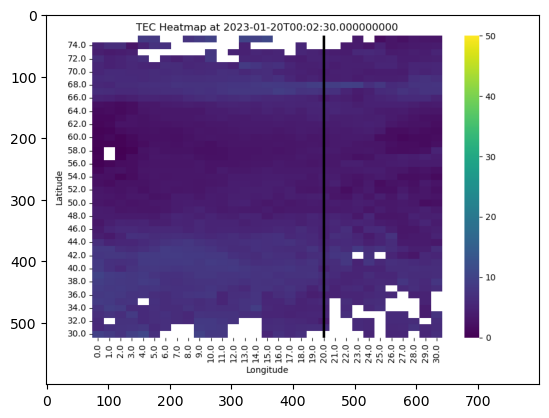

In [7]:
frames = sorted(df['datetime'].unique())
fig, ax = plt.subplots()

# Create the animation using ArtistAnimation
animation = FuncAnimation(fig, update, frames=frames, interval=100)

# Save the animation as a GIF file
#animation.save('heatmap_animation.gif', writer='imagemagick')

# Save the animation as an MP4 file (requires ffmpeg or avconv installed)
animation.save('animations/heatmap_animation_vtec_norr2.mp4', writer='ffmpeg')
